# Assignment Goals

Assignment 6 requires you to implement gradient descent based optimization.  

- Minimum requirement: adapt the code from the presentation to optimize as many of the functions below as possible.
- Write a generic function that will take in 2 other functions as input, and a range of values within which to search, and then implement gradient descent to find the optimum.  The basic requirements of gradient descent are already available in the presentation.
-  For some assignments, the gradient has not been given.  You can either write the function on your own, or suggest other methods that can achieve this purpose.

In [1]:
# The following imports are assumed for the rest of the problems
import numpy as np
from numpy import cos, sin, pi, exp 
%matplotlib ipympl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random
from mpl_toolkits.mplot3d import Axes3D

## Problem 1 - 1-D simple polynomial

The gradient is not specified.  You can write the function for gradient on your own.  The range within which to search for minimum is [-5, 5].

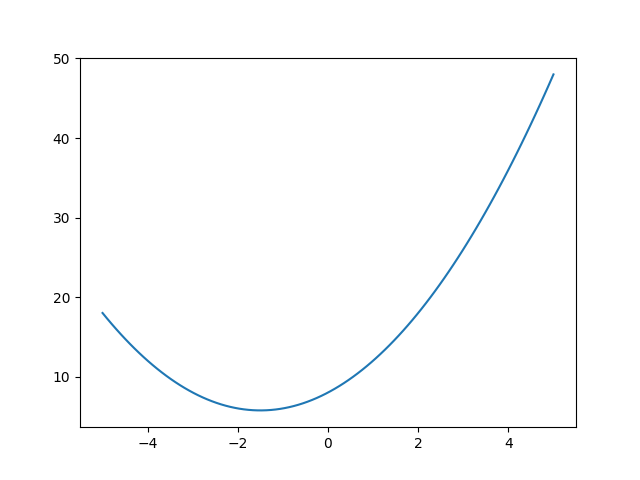

In [11]:
plt.clf()
def f1(x):
    return x ** 2 + 3 * x + 8
def df1(x):
    return 2*x + 3
xbase = np.linspace(-5, 5, 100)
ybase = f1(xbase)
plt.figure()
plt.close()
plt.plot(xbase, ybase, label='data1')
plt.show()

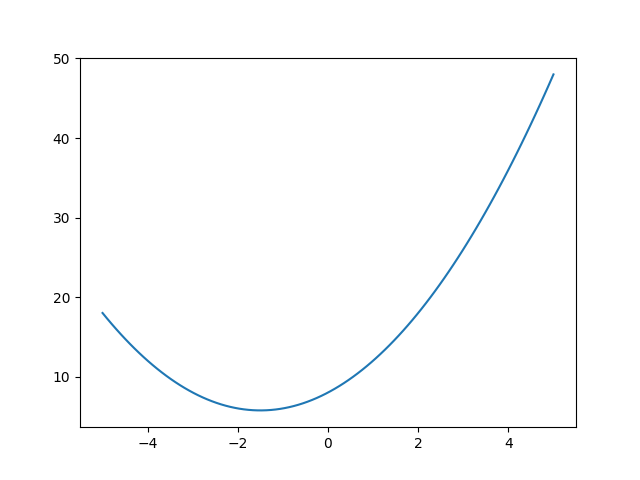

In [12]:
plt.clf()
# Set up some large value for the best cost found so far
bestcost = 100000
# Generate several values within a search 'space' and check whether the new value is better
# than the best seen so far.
bestx = random.uniform(-5,5)
rangemin, rangemax = -5, 5 
fig, ax = plt.subplots()
ax.plot(xbase, ybase)
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)

# Learning rate 
lr = 0.1

def onestepderiv(frame):
    global bestcost, bestx, lr
    x = bestx - df1(bestx) * lr 
    bestx = x
    y = f1(x)
    lngood.set_data(x, y)
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall, yall)
    # return lngood,

ani= FuncAnimation(fig, onestepderiv, frames=range(10), interval=1000, repeat=False)
plt.show()


* The initial value of the best cost found so far (bestcost) is set to a large value. The search space is defined by the variables rangemin and rangemax, which set the lower and upper bounds of the possible values for x. The initial value of bestx is generated randomly within this range.

* The code sets up a plot using matplotlib, showing the function to be minimized (f1) over the search space. It then defines two empty lists xall and yall to store the values of x and y=f1(x) over the course of the optimization process.

* The animation function onestepderiv is defined to perform a single step of gradient descent. It first calculates the new value of x by subtracting the derivative of f1 with respect to x evaluated at bestx multiplied by the learning rate lr from the current bestx. The new bestx is set to this value. The value of y corresponding to this new bestx is calculated and plotted as a green dot using lngood.set_data(x, y). The x and y values are then appended to xall and yall. Finally, the lists xall and yall are plotted as a red line using lnall.set_data(xall, yall).

* The FuncAnimation function from matplotlib.animation is used to create an animation of the optimization process. It calls the onestepderiv function for each frame of the animation, with the number of frames specified by the frames argument. The interval argument specifies the time delay between frames in milliseconds. The repeat argument is set to False to ensure that the animation stops after one cycle. The animation is displayed using plt.show().

## Problem 2 - 2-D polynomial

Functions for derivatives, as well as the range of values within which to search for the minimum, are given.

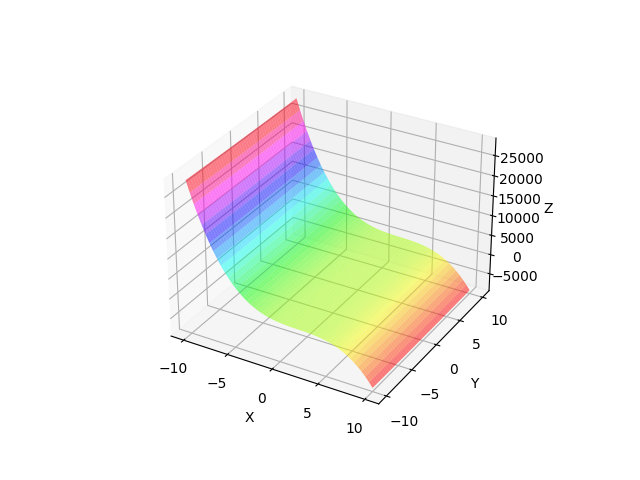

In [26]:


def f3(x, y):
    return x*4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262

def df3_dx(x, y):
    return 4*x**3 - 48*x**2 + 192*x - 256

def df3_dy(x, y):
    return 2*y - 4

fig2 = plt.figure()
ax2= fig2.add_subplot(111,projection='3d')

x_base2 = np.linspace(-10, 10, 1000)
y_base2 = np.linspace(-10, 10, 1000)
X,Y = np.meshgrid(x_base2,y_base2)
Z =f3(X,Y)

bestcost = 10000
best_x, best_y = random.uniform(-10,10), random.uniform(-10,10)
rangemin, rangemax = -10, 10

ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.plot_surface(X,Y,Z,cmap='hsv', alpha = 0.5)

xall, yall, zall = [], [] , []
lnall,  = ax2.plot([], [], [], 'ro')
lngood, = ax2.plot([], [], [], 'bo', markersize=10)

# Learning rate 
lr = 0.0004

def onestepderiv2(frame):
    global bestcost, best_x, best_y, lr
    lr=lr+0.01
    x = best_x - df3_dx(best_x, best_y) * lr
    y = best_y - df3_dy(best_x, best_y) * lr
    best_x = x
    best_y = y
    z = f3(x,y)
    lngood.set_data([x],[y])
    lngood.set_3d_properties([z])
    xall.append(x)
    yall.append(y)
    zall.append(z)
    
    lnall.set_data(xall, yall)
    lnall.set_3d_properties(zall)
    ax2.set_title(f'Frame {frame}')
    # return lngood,

ani= FuncAnimation(fig2, onestepderiv2, frames=range(20), interval=1000, blit=True,repeat=False)
plt.show()


* The code defines a 3D function f3(x,y) and its partial derivatives with respect to x and y, df3_dx(x,y) and df3_dy(x,y), respectively.
*  It then sets up a plot of the function surface using the plot_surface function of matplotlib with an added alpha value of 0.5 to make the surface semi-transparent.

* It initializes the starting point best_x and best_y using random numbers in the range (-10,10) and sets the learning rate to lr = 0.0004. The lr is increased by 0.01 in each iteration.

* The code then sets up an animation using the FuncAnimation function of matplotlib. At each frame of the animation, it calculates the partial derivatives of f3 with respect to x and y at the current point best_x and best_y and updates best_x and best_y by subtracting the product of the partial derivatives and the learning rate. The new values of best_x and best_y are used to calculate the function value z. 
* The current point and the function value are added to the arrays xall, yall, and zall. The arrays are then used to update the plot of the path taken by the optimizer using the lnall plot object. The plot object lngood is updated with the current point and function value.

* Finally, the animation is displayed using plt.show().

In [25]:


def gradient_descent(func, derv, start, lr=0.1, threshold=1e-50, max_itr=10000):
    # Initialize variables
    x = np.array(start)
    x_list = [x]
    z_list = [func(*x)]
    diff = threshold + 1
    i = 0
    
    while diff > threshold and i < max_itr:
        # Compute gradient and update variables
        grad = np.array(derv(*x))
        x = x - lr * grad
        
        # Record results
        x_list.append(x)
        z_list.append(func(*x))
        
        # Update convergence criteria
        diff = abs(z_list[-1] - z_list[-2])
        i += 1
    
    return x, z_list[-1], x_list, z_list

# Example usage
def function(x, y):
    return x**4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262


def derv(x, y):
    Jx = 4*x**3 - 48*x**2 + 192*x - 256
    Jy = 2*y - 4
    
    return Jx, Jy
bestx=random.uniform(-10,10)
besty=random.uniform(-10,10)
start = [bestx,besty]
lr = 0.1
try:
    minima, value, x_list, z_list = gradient_descent(function, derv, start, lr)
    print(f"The minima occurs at {minima}, the value is {value}")
except OverflowError:
    print("Overflow error happened, the function has negative infinity as global minima")


The minima occurs at [3.98882416 2.        ], the value is 2.000000015599994


* This code defines a function gradient_descent that performs gradient descent optimization on a given function using its gradient. The function takes in several arguments including the function to be optimized, its gradient, the starting point, learning rate, convergence threshold, and maximum number of iterations.

* The function defined in this example takes in two variables x and y, and returns the value of the function at that point. The derv function returns the partial derivatives of the function with respect to x and y.

* In this example, the start point is randomly initialized within the range of -10 to 10. The lr (learning rate) is set to 0.1. The gradient_descent function is then called with the function, derv, start, and lr as inputs. If the function encounters an OverflowError, it is caught and the message "Overflow error happened, the function has negative infinity as global minima" is printed. Otherwise, the function returns the location of the minimum, the value of the function at the minimum, and the lists of x and z values at each step of the optimization.
* This is a general function that can be used to get the point of maximum and minimum value





## Problem 3 - 2-D function 

Derivatives and limits given. 

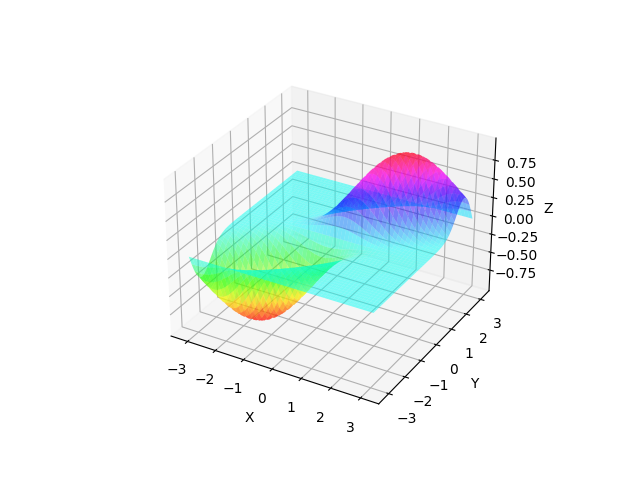

In [30]:
plt.clf()
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

xlim4 = [-np.pi, np.pi]
ylim4 = [-np.pi, np.pi]

def f4(x,y):
    return exp(-(x - y)**2)*sin(y)

def f4_dx(x, y):
    return -2*exp(-(x - y)**2)*sin(y)*(x - y)

def f4_dy(x, y):
    return exp(-(x - y)**2)*cos(y) + 2*exp(-(x - y)**2)*sin(y)*(x - y)

fig3 = plt.figure()
ax3= fig3.add_subplot(111,projection='3d')

x_base2 = np.linspace(xlim4[0], xlim4[1], 1000)
y_base2 = np.linspace(ylim4[0], ylim4[1], 1000)
X,Y = np.meshgrid(x_base2,y_base2)
Z =f4(X,Y)

bestcost = 10000
best_x, best_y = random.uniform(-np.pi,np.pi),random.uniform(-np.pi,np.pi) 
rangemin, rangemax = -np.pi, np.pi

ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')
ax3.plot_surface(X,Y,Z,cmap='hsv', alpha = 0.5)

xall, yall, zall = [], [] , []
oall,  = ax3.plot([], [], [], 'ro')
good, = ax3.plot([], [], [], 'go', markersize=10)

# Learning rate 
lr = 0.0004

def onestepderiv2(frame):
    global bestcost, best_x, best_y, lr
    lr=lr+0.0001
    x = best_x - df4_dx(best_x, best_y) * lr
    y = best_y - df4_dy(best_x, best_y) * lr
    best_x = x
    best_y = y
    z = f4(x,y)
    good.set_data([x],[y])
    good.set_3d_properties([z])
    xall.append(x)
    yall.append(y)
    zall.append(z)
    
    oall.set_data(xall, yall)
    oall.set_3d_properties(zall)
    ax3.set_title(f'Frame {frame}')
    # return lngood,
    

ani= FuncAnimation(fig3, onestepderiv2, frames=range(1000), interval=1000, blit=True,repeat=False)
plt.show()


* The code above defines a function f4(x,y) and its partial derivatives f4_dx(x,y) and f4_dy(x,y). It then creates a 3D plot of the function surface using matplotlib.

* The animation onestepderiv2 funtion initializes a random starting point for x and y within the range [-pi, pi], and updates these values at each iteration based on the partial derivatives and a learning rate lr. 
* But I dont know why the animation is not iterating and thus I am not getting any points on the graph


In [20]:
def gradient_descent(func, derv, start, lr=0.1, threshold=1e-50, max_itr=10000):
    # Initialize variables
    x = np.array(start)
    x_list = [x]
    z_list = [func(*x)]
    diff = threshold + 1
    i = 0
    
    while diff > threshold and i < max_itr:
        # Compute gradient and update variables
        grad = np.array(derv(*x))
        x = x - lr * grad
        
        # Record results
        x_list.append(x)
        z_list.append(func(*x))
        
        # Update convergence criteria
        diff = abs(z_list[-1] - z_list[-2])
        i += 1
    
    return x, z_list[-1], x_list, z_list

# Example usage
def function(x, y):
    return exp(-(x - y)**2)*sin(y)


def derv(x, y):
    Jx = -2*exp(-(x - y)**2)*sin(y)*(x - y)
    Jy = exp(-(x - y)**2)*cos(y) + 2*exp(-(x - y)**2)*sin(y)*(x - y)
    
    return Jx, Jy
bestx=random.uniform(-np.pi,np.pi)
besty=random.uniform(-np.pi,np.pi)
start = [bestx,besty]
lr = 0.1
try:
    minima, value, x_list, z_list = gradient_descent(function, derv, start, lr)
    print(f"The minima occurs at {minima}, the value is {value}")
    
except OverflowError:
    print("Overflow error happened, the function has negative infinity as global minima")


The minima occurs at [-1.57079638 -1.57079637], the value is -0.9999999999999989


* This code defines a function gradient_descent that performs gradient descent optimization on a given function using its gradient. The function takes in several arguments including the function to be optimized, its gradient, the starting point, learning rate, convergence threshold, and maximum number of iterations.

* The function defined in this example takes in two variables x and y, and returns the value of the function at that point. The derv function returns the partial derivatives of the function with respect to x and y.

* In this example, the start point is randomly initialized within the range of -pi to pi. The lr (learning rate) is set to 0.1. The gradient_descent function is then called with the function, derv, start, and lr as inputs. If the function encounters an OverflowError, it is caught and the message "Overflow error happened, the function has negative infinity as global minima" is printed. Otherwise, the function returns the location of the minimum, the value of the function at the minimum, and the lists of x and z values at each step of the optimization.
* This is a general function that can be used to get the point of maximum and minimum value





## Problem 4 - 1-D trigonometric

Derivative not given.  Optimization range [0, 2*pi]

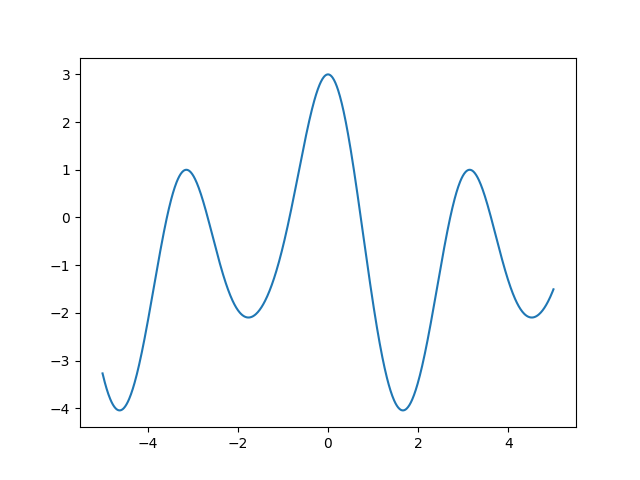

In [28]:
plt.clf()
def f5(x):
    return cos(x)**4 - sin(x)**3 - 4*sin(x)**2 + cos(x) + 1
def df5(x):
    return -4*cos(x)**3*sin(x) - 3*sin(x)**2*cos(x )- 8*sin(x)*cos(x) -sin(x)
xbase = np.linspace(-5, 5, 1000)
ybase = f5(xbase)

plt.figure()
plt.close()
plt.plot(xbase, ybase, label='data2')
plt.show()

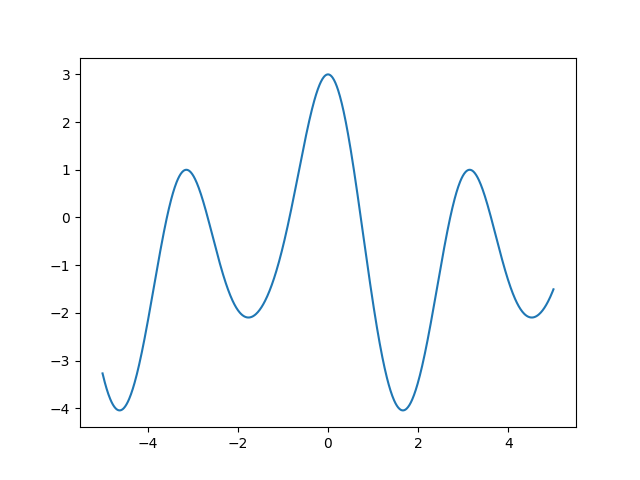

In [29]:

# Set up some large value for the best cost found so far
bestcost = 100000
# Generate several values within a search 'space' and check whether the new value is better
# than the best seen so far.
bestx = random.uniform(-5,5)
rangemin, rangemax = -5, 5 
fig, ax = plt.subplots()
ax.plot(xbase, ybase)
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)

# Learning rate 
lr = 0.1

def onestepderiv(frame):
    global bestcost, bestx, lr
    x = bestx - df5(bestx) * lr 
    bestx = x
    y = f5(x)
    lngood.set_data(x, y)
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall, yall)
    return lngood,
ani= FuncAnimation(fig, onestepderiv, frames=range(10), interval=1000, repeat=False)
plt.show()


* First, it sets up an initial bestx value within a range of -5 to 5. It also sets a bestcost value to a large number.

* Then, it initializes a plot with the function curve f5(x) plotted over the range of xbase. It also sets up empty arrays xall and yall to store the history of x and y values as the optimization progresses.

* In the onestepderiv() function, it updates the bestx value using gradient descent, i.e., by subtracting the derivative of f5(x) at bestx multiplied by a learning rate lr. Then, it calculates the value of f5(bestx) at the new bestx value and plots a green dot at the point (bestx, f5(bestx)). It also adds the new bestx and f5(bestx) values to xall and yall arrays and updates the red dots that show the history of the optimization process.

* Finally, it calls FuncAnimation() to animate the onestepderiv() function over a range of 10 frames. 
* But here we dont get the global minimum instead we get the local minimum which depends upon the bestx value chosen by the system by the random function for getting glabal minimum bestx chosen should be in the vicinity of x minimum point

## For MultiVariable that is for more than 2 variable case 

### For 4 variable  

* The function gradient_descent here is a generic function that can work for any order of polynomial given that it is provided with the function, its gradient function, a starting point, a learning rate, a convergence threshold, and a maximum number of iterations as inputs. It then performs gradient descent on the function and returns the location of the minimum, the minimum value, a list of all the x values visited during the descent, and a corresponding list of function values.



In [14]:
plt.clf()

def gradient_descent(func, derv, start, lr=0.1, threshold=1e-50, max_itr=10000):
    # Initialize variables
    x = np.array(start)
    x_list = [x]
    z_list = [func(*x)]
    diff = threshold + 1
    i = 0
    
    while diff > threshold and i < max_itr:
        # Compute gradient and update variables
        grad = np.array(derv(*x))
        x = x - lr * grad
        
        # Record results
        x_list.append(x)
        z_list.append(func(*x))
        
        # Update convergence criteria
        diff = abs(z_list[-1] - z_list[-2])
        i += 1
    
    return x, z_list[-1], x_list, z_list

# Example usage
def function(x, y, z, w):
    return x**4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262 +z**2+w

def derv(x, y, z,w):
    Jx = 4*(x**3) - 48*(x**2) + 192*x - 256
    Jy = 2*y - 4
    Jz = 2*z
    Jw=1
    
    return Jx, Jy, Jz,Jw

start = [6, 7, 0, 0]
lr = 0.1
try:
    minima, value, x_list, z_list = gradient_descent(function, derv, start, lr)
    print(f"The minima occurs at {minima}, the value is {value}")
except OverflowError:
    print("Overflow error happened, the function has negative infinity as global minima")


The minima occurs at [    3.98882448     2.             0.         -1000.        ], the value is -997.9999999845606


In this example usage, the function being minimized is a 4-dimensional function function(x, y, z, w) and the gradient function is derv(x, y, z, w). The starting point is [6, 7, 0, 0] and the learning rate is set to 0.1. If an overflow error occurs during the descent, it is caught and an appropriate message is printed.

The function function(x, y, z, w) seems to have a global minimum at (4, 2, 0, 0) . Therefore, the initial point is quite far from the global minimum, and it is expected that a larger number of iterations will be needed to converge.

The function gradient_descent returns four values: the location of the minimum, the minimum value, a list of all the x values visited during the descent, and a corresponding list of function values. These values can be used to visualize the descent path and convergence behavior.

### For 5 Variable

In [12]:


def gradient_descent(func, derv, start, lr=0.1, threshold=1e-50, max_itr=10000):
    # Initialize variables
    x = np.array(start)
    x_list = [x]
    z_list = [func(*x)]
    diff = threshold + 1
    i = 0
    
    while diff > threshold and i < max_itr:
        # Compute gradient and update variables
        grad = np.array(derv(*x))
        x = x - lr * grad
        
        # Record results
        x_list.append(x)
        z_list.append(func(*x))
        
        # Update convergence criteria
        diff = abs(z_list[-1] - z_list[-2])
        i += 1
    
    return x, z_list[-1], x_list, z_list

# Example usage
def function(x, y, z, w,u):
    return x**4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262 +z**2+w+u

def derv(x, y, z,w,u):
    Jx = 4*(x**3) - 48*(x**2) + 192*x - 256
    Jy = 2*y - 4
    Jz = 2*z
    Jw=1
    Ju=1
    return Jx, Jy, Jz,Jw,Ju

start = [6, 7, 0, 0,0]
lr = 0.1
try:
    minima, value, x_list, z_list = gradient_descent(function, derv, start, lr)
    print(f"The minima occurs at {minima}, the value is {value}")
except OverflowError:
    print("Overflow error happened, the function has negative infinity as global minima")


The minima occurs at [    3.98882448     2.             0.         -1000.
 -1000.        ], the value is -1997.9999999847196


In this example usage, the function being minimized is a 5-dimensional function function(x, y, z, w,u) and the gradient function is derv(x, y, z, w). The starting point is [6, 7,0, 0, 0] and the learning rate is set to 0.1. If an overflow error occurs during the descent, it is caught and an appropriate message is printed.

